In [1]:
#installation of opencv
#!pip install opencv-python

    100% |████████████████████████████████| 28.3MB 1.8MB/s eta 0:00:01    48% |███████████████▌                | 13.7MB 53.0MB/s eta 0:00:01
fastai 1.0.59 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
### Import libraries and packages
import cv2
import glob 
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class FlowerAutoEncoder(nn.Module):
    def __init__(self):
        super(FlowerAutoEncoder, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 64, 3, padding = 1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding = 1)
                
        ## 128 -> 64 -> 32 -> 16 
        self.pool = nn.MaxPool2d(2, 2)
        
        self.t_conv1 = nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1)
        self.t_conv2 = nn.ConvTranspose2d(64, 32, 3, stride=1, padding=1)
        self.t_conv3 = nn.ConvTranspose2d(32, 8, 4, stride=2, padding=1)
        self.t_conv4 = nn.ConvTranspose2d(8, 1, 3, stride=1, padding=1)
        
        
    def forward(self, x):
        #x = x.view(x.size(0))
        x = F.relu(self.conv1(x)) #d 3-> 16
        x = self.pool(x) #128 -> 64
        x = F.relu(self.conv2(x)) #d 16 -> 32
        x = self.pool(x) #64 -> 32
        #x = F.relu(self.conv3(x))
        #x = self.pool(x) ## d 32 -> 64
        
        x = F.relu(self.t_conv1(x))
        #x = F.interpolate(x, scale_factor=2) #16 -> 32
        
        x = F.relu(self.t_conv2(x))
        #x = F.interpolate(x, scale_factor=2) #32 -> 64
        
        x = F.relu(self.t_conv3(x))
        #x = F.interpolate(x, scale_factor=2) #64 -> 128
        x = self.t_conv4(x)
        x = torch.sigmoid(x)
        return x

model = FlowerAutoEncoder()
print(model)

FlowerAutoEncoder(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (t_conv2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (t_conv3): ConvTranspose2d(32, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (t_conv4): ConvTranspose2d(8, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [4]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

In [5]:
gray_transform = transforms.Compose([ 
                               transforms.Grayscale(num_output_channels=1),
                               transforms.ToTensor()
                            
                               ])

transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))
                               ])


color_imgs = datasets.ImageFolder('new_color_images/', transform= transform)
gray_imgs  = datasets.ImageFolder('new_gray_images/', transform= gray_transform)
color_train_loader = DataLoader(dataset=color_imgs, batch_size=32, shuffle=False, num_workers=0)
gray_train_loader  = DataLoader(dataset=gray_imgs,  batch_size=32, shuffle=False, num_workers=0)

In [6]:
def generate_gray_flowers(img_path):
    img = cv2.imread(img_path)


    image_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))
    ])
    img = image_transform(img).unsqueeze(0)
    img = img.cuda()

    model.eval()
    with torch.no_grad():
        new_gray_img = model.forward(img)
    
    gen_img = new_gray_img.cpu().detach().numpy() 
    gen_img = np.squeeze(gen_img, axis=0)
    gen_img = np.squeeze(gen_img, axis=0)
    
    plt.imshow(gen_img, cmap='gray')
    plt.show()

In [7]:
import os
import glob
img_dir = "flower_images/flower_images/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)

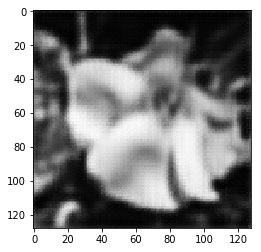

Epoch:  0  Final Loss:  0.6533699550649577
Epoch:  1  Final Loss:  0.20216613909915873
Epoch:  2  Final Loss:  0.1668790025277096
Epoch:  3  Final Loss:  0.14897214810837778
Epoch:  4  Final Loss:  0.13653257008838027
Epoch:  5  Final Loss:  0.12780108306099447
Epoch:  6  Final Loss:  0.1153921295741671
Epoch:  7  Final Loss:  0.10924475362295644
Epoch:  8  Final Loss:  0.10284851573146227
Epoch:  9  Final Loss:  0.09816030491339534


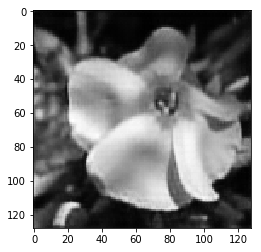

Epoch:  10  Final Loss:  0.0929112300734248
Epoch:  11  Final Loss:  0.09189426487213687
Epoch:  12  Final Loss:  0.08544725885516719
Epoch:  13  Final Loss:  0.08252587741273537
Epoch:  14  Final Loss:  0.08221521712186043
Epoch:  15  Final Loss:  0.07677010780102328
Epoch:  16  Final Loss:  0.07486578717566374
Epoch:  17  Final Loss:  0.07310959448417027
Epoch:  18  Final Loss:  0.07031321326238021
Epoch:  19  Final Loss:  0.07074339171512085


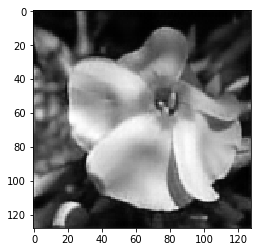

Epoch:  20  Final Loss:  0.0665403243742491
Epoch:  21  Final Loss:  0.06608788067834419
Epoch:  22  Final Loss:  0.06364781607203839
Epoch:  23  Final Loss:  0.0643434176188812
Epoch:  24  Final Loss:  0.06105442586959454
Epoch:  25  Final Loss:  0.061504610863171126
Epoch:  26  Final Loss:  0.05901447628020195
Epoch:  27  Final Loss:  0.05990135254697841
Epoch:  28  Final Loss:  0.0570389349013567
Epoch:  29  Final Loss:  0.05656423259591847


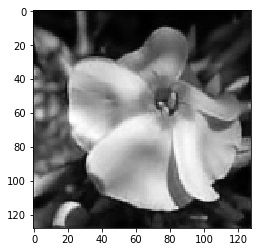

Epoch:  30  Final Loss:  0.0580978048801945
Epoch:  31  Final Loss:  0.05464812289727362
Epoch:  32  Final Loss:  0.05413742704937855
Epoch:  33  Final Loss:  0.05445462537177822
Epoch:  34  Final Loss:  0.05255326355823822
Epoch:  35  Final Loss:  0.054508167743813576
Epoch:  36  Final Loss:  0.051514519345864915
Epoch:  37  Final Loss:  0.051053169052721115
Epoch:  38  Final Loss:  0.05190178809131969
Epoch:  39  Final Loss:  0.049940748924487514


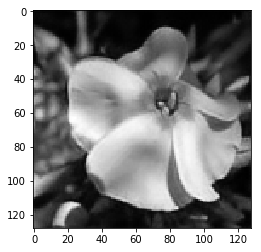

Epoch:  40  Final Loss:  0.05150679699880512
Epoch:  41  Final Loss:  0.04896691294485017
Epoch:  42  Final Loss:  0.048526797165865436
Epoch:  43  Final Loss:  0.049279269745998215
Epoch:  44  Final Loss:  0.04764811840039073
Epoch:  45  Final Loss:  0.04929539420756332
Epoch:  46  Final Loss:  0.04652282272122408
Epoch:  47  Final Loss:  0.04826386954243246
Epoch:  48  Final Loss:  0.045833159189083074
Epoch:  49  Final Loss:  0.046251057385744754


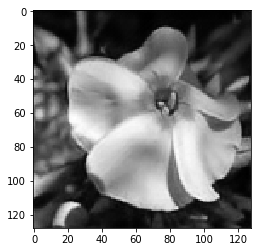

Epoch:  50  Final Loss:  0.05017569404618259


In [8]:
total_epochs = 50
model.train()
model = model.cuda()
for epoch in range(total_epochs +1):
    train_loss =0.0
    for i, data in enumerate(zip(color_train_loader, gray_train_loader)):
        color_imgs, _ = data[0]
        gray_imgs, _  = data[1]
        color_imgs = color_imgs.cuda()
        gray_imgs = gray_imgs.cuda()
        optimizer.zero_grad()                #Z
        outputs = model(color_imgs)           #M
        loss = criterion(outputs, gray_imgs) #C
        loss.backward()                      #B
        optimizer.step()                     #Ssv
        train_loss += loss.item()*len(color_imgs)
    if epoch%10 ==0:
        generate_gray_flowers(files[2])
    print("Epoch: ",epoch," Final Loss: ",train_loss/len(color_train_loader))

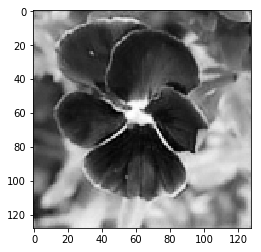

In [9]:
generate_gray_flowers(files[4])

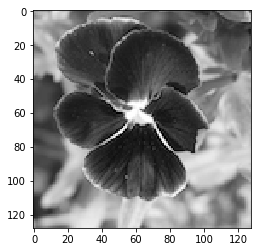

In [10]:
img = cv2.imread(files[4])
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY ) 
plt.imshow(img, cmap = 'gray')

In [11]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

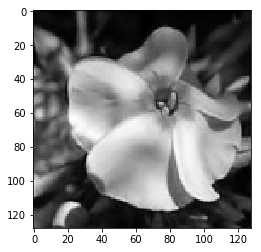

Epoch:  0  Final Loss:  0.045289846088149045
Epoch:  1  Final Loss:  0.04434754459285423
Epoch:  2  Final Loss:  0.04408992607996129
Epoch:  3  Final Loss:  0.04386607217684127
Epoch:  4  Final Loss:  0.04365591868235354


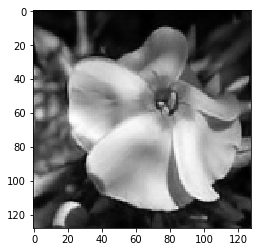

Epoch:  5  Final Loss:  0.043441901751385445
Epoch:  6  Final Loss:  0.04324178750577726
Epoch:  7  Final Loss:  0.04303288427099847
Epoch:  8  Final Loss:  0.04283533993650947
Epoch:  9  Final Loss:  0.04264176756208926


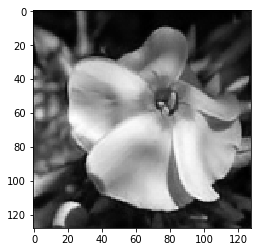

Epoch:  10  Final Loss:  0.04245299391709922
Epoch:  11  Final Loss:  0.042267789917164726
Epoch:  12  Final Loss:  0.0420876852514451
Epoch:  13  Final Loss:  0.04190962207748702
Epoch:  14  Final Loss:  0.041736885643841926


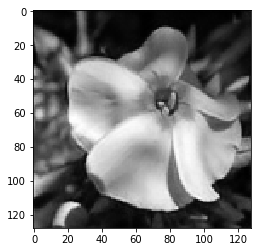

Epoch:  15  Final Loss:  0.041567688807845116
Epoch:  16  Final Loss:  0.04139974295047291
Epoch:  17  Final Loss:  0.04123623223092995
Epoch:  18  Final Loss:  0.041077168086511004
Epoch:  19  Final Loss:  0.0409207431142006


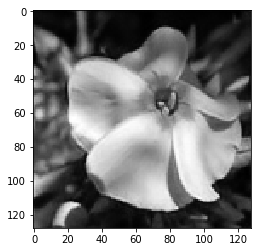

Epoch:  20  Final Loss:  0.04076422914339785
Epoch:  21  Final Loss:  0.04061122382419151
Epoch:  22  Final Loss:  0.040459350731812026
Epoch:  23  Final Loss:  0.04030994146147318
Epoch:  24  Final Loss:  0.040163171363242885


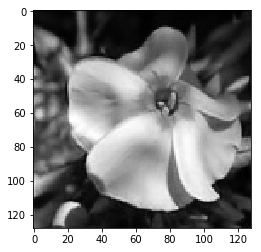

Epoch:  25  Final Loss:  0.040017122811262025
Epoch:  26  Final Loss:  0.03987236564423431
Epoch:  27  Final Loss:  0.039729676470814046
Epoch:  28  Final Loss:  0.039589539219282176
Epoch:  29  Final Loss:  0.03945068786280197


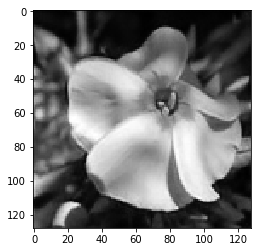

Epoch:  30  Final Loss:  0.03931224767706896
Epoch:  31  Final Loss:  0.03917613949038481
Epoch:  32  Final Loss:  0.03904160786942955
Epoch:  33  Final Loss:  0.03890619038097691
Epoch:  34  Final Loss:  0.038772968068849625


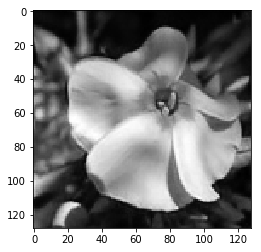

Epoch:  35  Final Loss:  0.03863935844090424
Epoch:  36  Final Loss:  0.038508376171975806
Epoch:  37  Final Loss:  0.03837729284637853
Epoch:  38  Final Loss:  0.038247483766131234
Epoch:  39  Final Loss:  0.03811869381420445


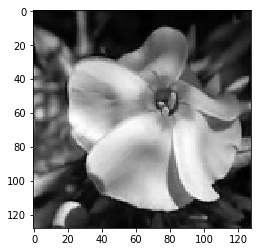

Epoch:  40  Final Loss:  0.037988192597894294
Epoch:  41  Final Loss:  0.03786008360615948
Epoch:  42  Final Loss:  0.037730873513378595
Epoch:  43  Final Loss:  0.037604062001041154
Epoch:  44  Final Loss:  0.03747502797724385


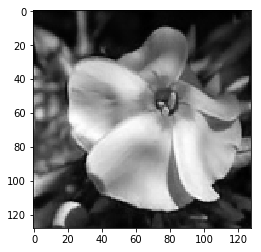

Epoch:  45  Final Loss:  0.037347741621105296
Epoch:  46  Final Loss:  0.03721747897042517
Epoch:  47  Final Loss:  0.03708857719443346
Epoch:  48  Final Loss:  0.03695719803503731
Epoch:  49  Final Loss:  0.036826602003553456


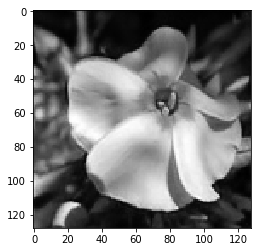

Epoch:  50  Final Loss:  0.036696577019858775


In [12]:
total_epochs = 50
model.train()
model = model.cuda()
for epoch in range(total_epochs +1):
    train_loss =0.0
    for i, data in enumerate(zip(color_train_loader, gray_train_loader)):
        color_imgs, _ = data[0]
        gray_imgs, _  = data[1]
        color_imgs = color_imgs.cuda()
        gray_imgs = gray_imgs.cuda()
        optimizer.zero_grad()                #Z
        outputs = model(color_imgs)           #M
        loss = criterion(outputs, gray_imgs) #C
        loss.backward()                      #B
        optimizer.step()                     #Ssv
        train_loss += loss.item()*len(color_imgs)
    if epoch%5 ==0:
        generate_gray_flowers(files[2])
    print("Epoch: ",epoch," Final Loss: ",train_loss/len(color_train_loader))

In [13]:
torch.save(model.state_dict(), 'working/model_deconv_0.03.state')

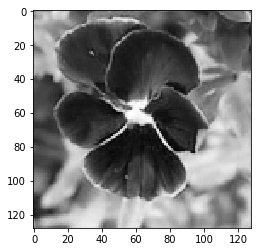

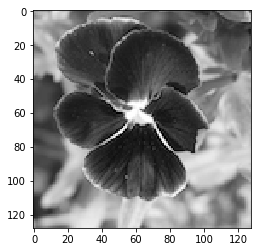

In [14]:
generate_gray_flowers(files[4])

img = cv2.imread(files[4])
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY ) 
plt.imshow(img, cmap = 'gray')